In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
covid_df =pd.read_csv("C:/Users/acer/Documents/data analytics/covid_19_india.csv")

In [3]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [5]:
covid_df.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], inplace = True,axis =1)

In [6]:
covid_df.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [7]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format = '%Y-%m-%d')

In [8]:
covid_df.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3
5,2020-02-04,Kerala,0,0,3
6,2020-02-05,Kerala,0,0,3
7,2020-02-06,Kerala,0,0,3
8,2020-02-07,Kerala,0,0,3
9,2020-02-08,Kerala,0,0,3


In [9]:
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured']+ covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,8112
18106,2021-08-11,Tripura,77811,773,80660,2076
18107,2021-08-11,Uttarakhand,334650,7368,342462,444
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,545
18109,2021-08-11,West Bengal,1506532,18252,1534999,10215


In [10]:
import pandas as pd
covid_df =pd.read_csv("C:/Users/acer/Documents/data analytics/covid_19_india.csv")
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"],
                           index = "State/UnionTerritory", aggfunc = max)

In [12]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [13]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [14]:
import pandas as pd
covid_df =pd.read_csv("C:/Users/acer/Documents/data analytics/covid_19_india.csv")
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"],
                           index = "State/UnionTerritory", aggfunc = max)
statewise.style.background_gradient(cmap = "cubehelix")

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646
Bihar****,715730,701234,9452
Cases being reassigned to states,9265,0,0
Chandigarh,61992,61150,811
Chhattisgarh,1003356,988189,13544


In [15]:
import pandas as pd
covid_df =pd.read_csv("C:/Users/acer/Documents/data analytics/covid_19_india.csv")
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured']+ covid_df['Deaths'])
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases'], ascending = False).reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

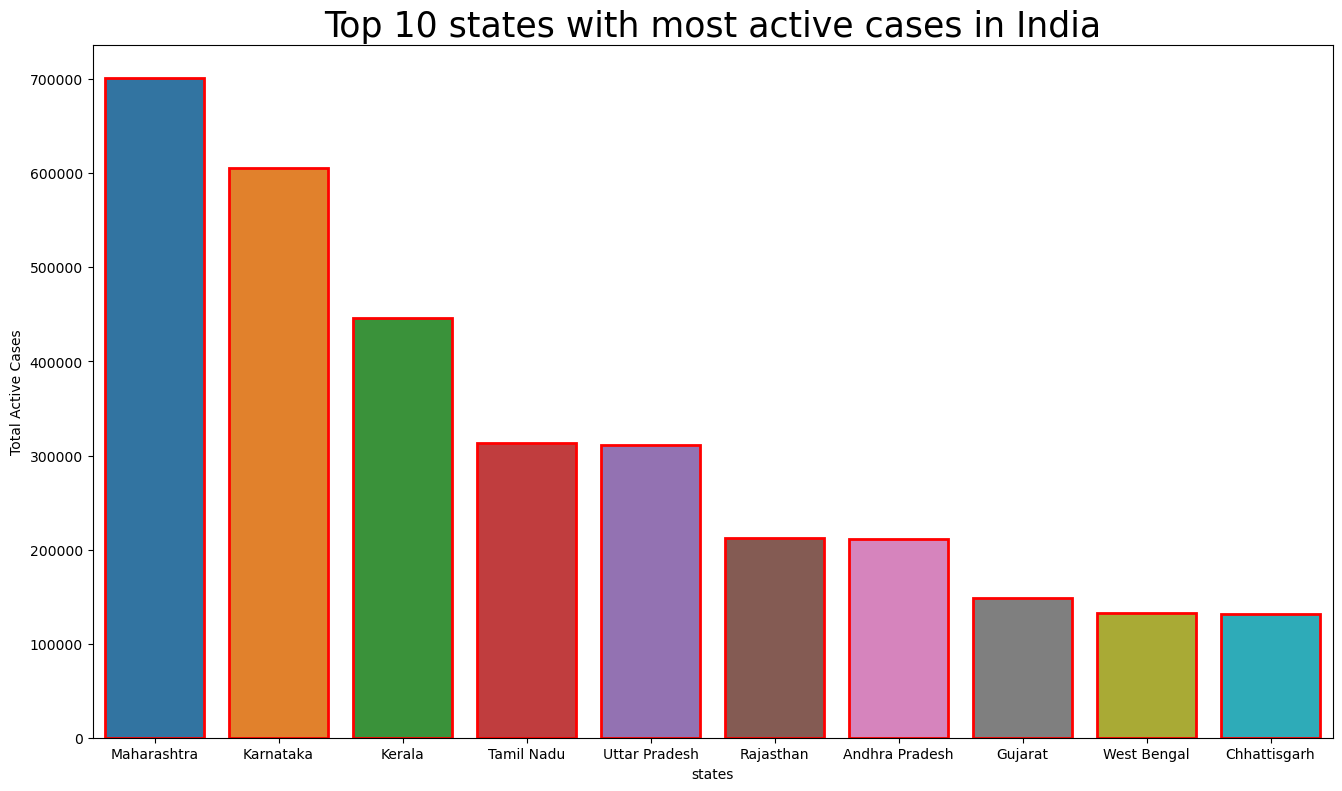

In [17]:
import pandas as pd
covid_df =pd.read_csv("C:/Users/acer/Documents/data analytics/covid_19_india.csv")
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured']+ covid_df['Deaths'])
top_10_active_cases = covid_df.groupby(by = 'State/UnionTerritory').max()[['Active_Cases', 'Date']].sort_values(by = ['Active_Cases'], ascending = False).reset_index()
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in India", size = 25)
import seaborn as sns
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 2, edgecolor ='red')
plt.xlabel("states")
plt.ylabel("Total Active Cases")
plt.show

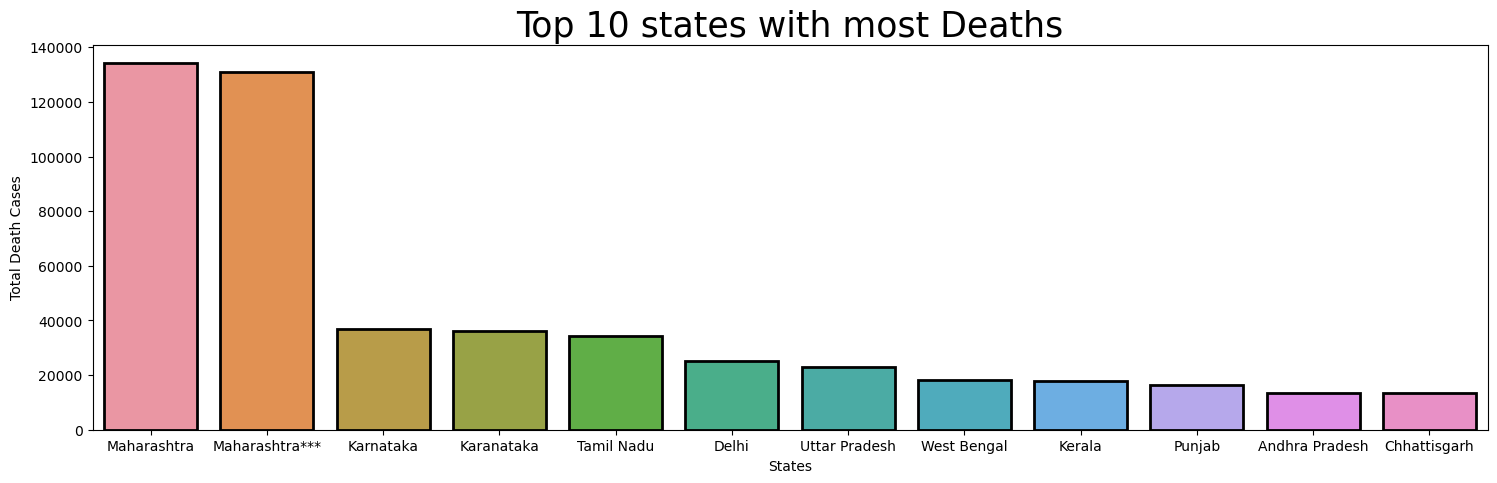

In [18]:
top_10_deaths = covid_df.groupby(by = 'State/UnionTerritory').max()[['Deaths', 'Date']].sort_values(by = ['Deaths'], ascending = False).reset_index()
fig = plt.figure(figsize=(18,5))
plt.title("Top 10 states with most Deaths", size = 25)
ax = sns.barplot(data = top_10_deaths.iloc[:12], y = "Deaths", x = "State/UnionTerritory", linewidth = 2, edgecolor = 'black')
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()